## General Object detection and/or segmentation (mask) using pretrained model of TorchVision

In [ ]:
import torchvision
import torch

### comment one of these models

# mask model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# without mask model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=False)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

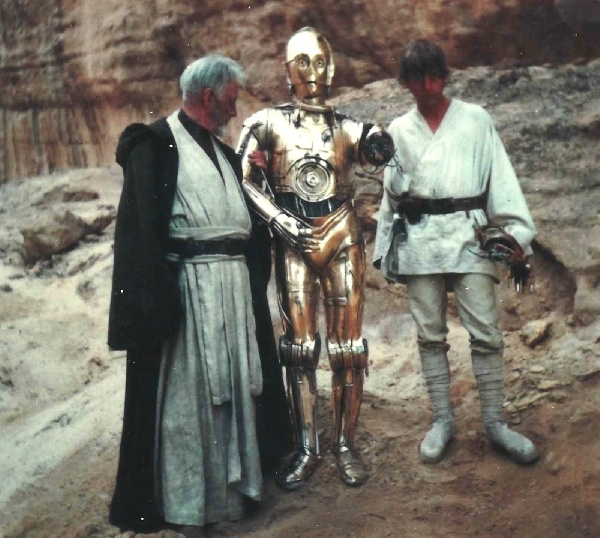

In [19]:
from PIL import Image
#img = Image.open('PennFudanPed/PNGImages/FudanPed00001.png')
img = Image.open('1495723812-threepio luke and ben star wars-0000.jpg')
img

In [22]:
from torchvision import transforms
trans = transforms.Compose([transforms.ToTensor()])
img_tensor = trans(img)
img_tensor.shape

torch.Size([3, 538, 600])

In [23]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
COCO_INSTANCE_CATEGORY_NAMES[17]

'cat'

In [24]:
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img_tensor.to(device)])
prediction

[{'boxes': tensor([[374.1237,  38.3092, 543.6310, 467.3937],
          [109.6914,  45.9683, 270.7522, 505.3545],
          [231.6700,  30.8320, 405.5782, 460.2547],
          [346.0415, 121.6780, 394.9879, 283.4205],
          [234.5242, 111.0412, 400.4407, 494.2550],
          [164.5361,  22.0876, 360.6738, 514.3041],
          [245.1353, 119.1619, 381.8480, 493.6995],
          [294.0392,  16.8670, 480.0522, 476.9527],
          [105.6860, 160.6098, 185.9136, 345.8416],
          [244.1507, 140.7098, 385.4850, 491.4440],
          [109.6150, 122.4959, 185.2706, 497.8124],
          [109.7146, 136.7350, 185.1073, 488.7841],
          [243.3852, 123.1470, 383.1805, 435.3826],
          [238.5839,  26.7183, 385.2303, 244.4396],
          [114.0066, 141.8083, 187.7178, 476.4413],
          [105.8775, 113.3168, 360.5422, 529.1042],
          [237.9147,  83.2829, 390.5979, 491.3506]]),
  'labels': tensor([ 1,  1,  1, 18,  4,  1, 19,  1, 31,  2, 35, 36, 14,  1, 32,  2, 18]),
  'scores': ten

In [25]:
labels = prediction[0]['labels']
scores = prediction[0]['scores']

In [26]:
def filter_objects(labels, scores, mapping_list=COCO_INSTANCE_CATEGORY_NAMES, alpha=0.9):
    for label, score in zip(labels, scores):
        if score>=alpha:
            print(score, mapping_list[label])
            
filter_objects(labels, scores, alpha=0.7)

tensor(0.9998) person
tensor(0.9957) person
tensor(0.9621) person


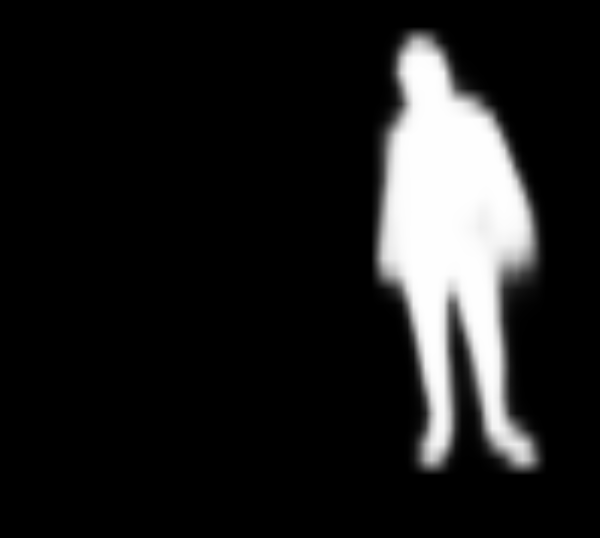

In [17]:
from torchvision import transforms

trans = transforms.Compose([transforms.ToPILImage()])

mask = prediction[0]['masks'][0]

mask = trans(mask)
mask